# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "imperial"
#query_url = f"{base_url}appid={api_key}&units={units}&q="

url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        pass
        
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mitsamiouli
Processing Record 2 of Set 1 | trairi
Processing Record 3 of Set 1 | anar darreh
City not found. Skipping...
Processing Record 4 of Set 1 | shar
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | karla
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | tyulyachi
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | marzuq
Processing Record 17 of Set 1 | luderitz
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | buxton
Processing Record 22 of Set 1 | t

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mitsamiouli,-11.3847,43.2844,28.51,70,100,3.92,KM,1677053158
1,trairi,-3.2778,-39.2689,24.56,89,100,3.63,BR,1677052909
2,shar,49.5886,81.0453,-0.82,76,27,4.36,KZ,1677053159
3,saint-philippe,-21.3585,55.7679,31.17,71,39,7.57,RE,1677053160
4,busselton,-33.6500,115.3333,25.77,46,6,8.22,AU,1677053160


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mitsamiouli,-11.3847,43.2844,28.51,70,100,3.92,KM,1677053158
1,trairi,-3.2778,-39.2689,24.56,89,100,3.63,BR,1677052909
2,shar,49.5886,81.0453,-0.82,76,27,4.36,KZ,1677053159
3,saint-philippe,-21.3585,55.7679,31.17,71,39,7.57,RE,1677053160
4,busselton,-33.6500,115.3333,25.77,46,6,8.22,AU,1677053160


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

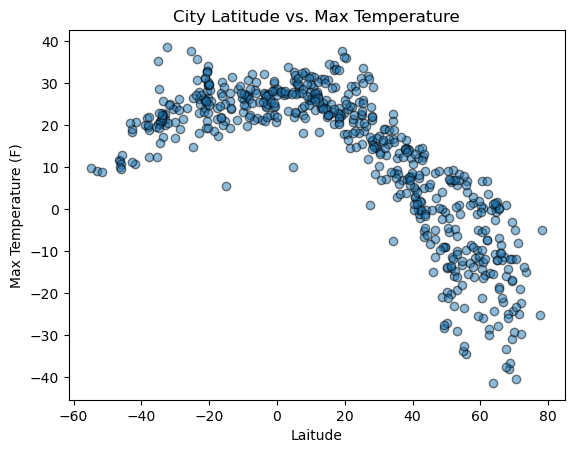

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

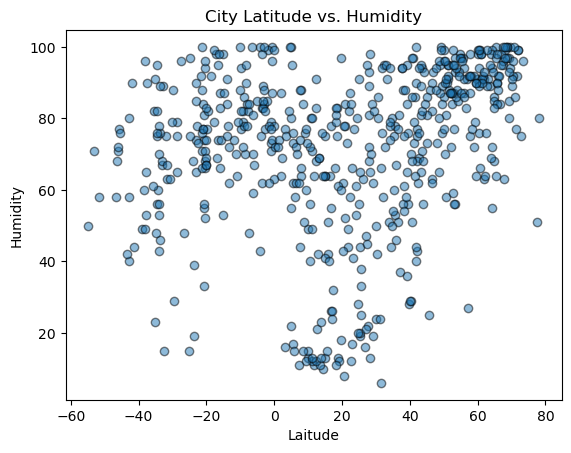

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Laitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

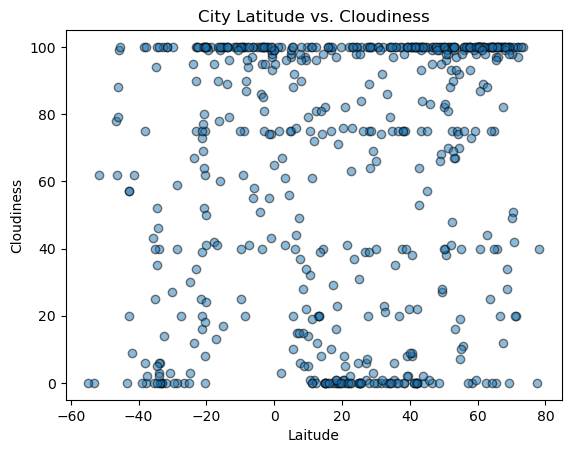

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

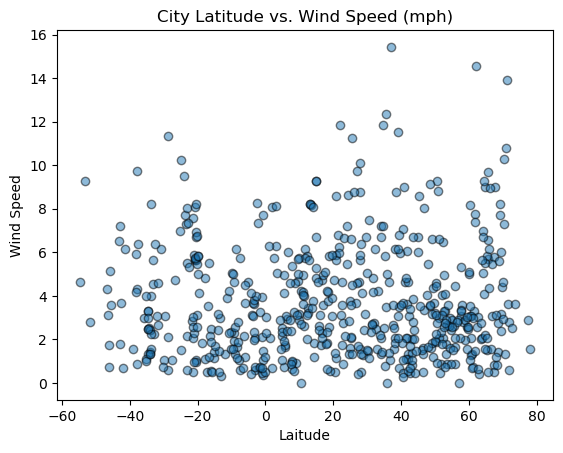

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.5)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #plt.scatter(x, y)
    #plt.plot(x,regress_values,"r-")
    return line_eq

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,shar,49.5886,81.0453,-0.82,76,27,4.36,KZ,1677053159
5,albany,42.6001,-73.9662,1.62,69,64,0.45,US,1677053031
6,khatanga,71.9667,102.5000,-22.44,99,100,0.60,RU,1677053161
8,tiksi,71.6872,128.8694,-19.04,92,100,3.62,RU,1677053162
9,karla,59.3723,24.9275,-5.01,79,75,2.57,EE,1677053162


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mitsamiouli,-11.3847,43.2844,28.51,70,100,3.92,KM,1677053158
1,trairi,-3.2778,-39.2689,24.56,89,100,3.63,BR,1677052909
3,saint-philippe,-21.3585,55.7679,31.17,71,39,7.57,RE,1677053160
4,busselton,-33.6500,115.3333,25.77,46,6,8.22,AU,1677053160
7,bluff,-46.6000,168.3333,11.56,58,78,4.33,NZ,1677053161


###  Temperature vs. Latitude Linear Regression Plot

The r-square is -0.8754095282481554
y = -0.78x + 36.62


KeyError: 'Latitude'

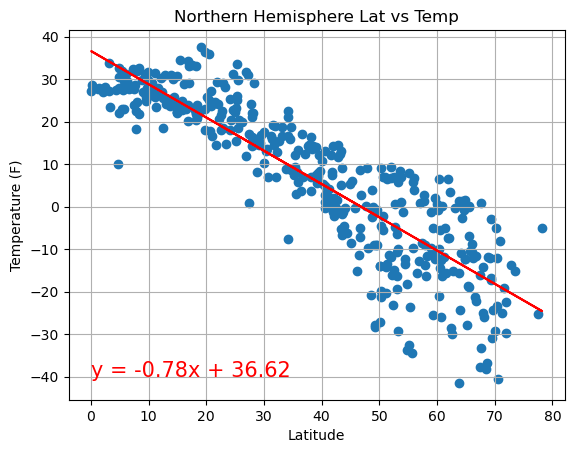

In [49]:
# Linear regression on Northern Hemisphere  

x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

regEQplotX = 0
regEQplotY = -40

#label the y axis
y_label = "Temperature (F)"

#Add the title
plt.title(f'Northern Hemisphere Lat vs Temp')

#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX, regEQplotY, y_label)

#save as a png 
plt.savefig(f'../output_data/Northern Hemisphere Lat vs Temp.png')
plt.show()

The r-square is 0.5193459660062842
y = 0.22x + 28.26


KeyError: 'Latitude'

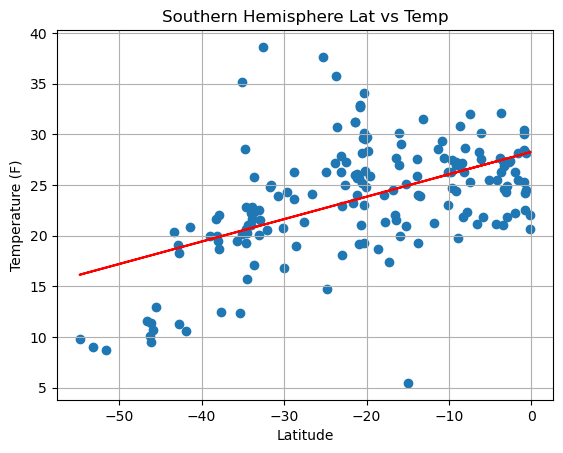

In [50]:
# Linear regression on Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

regEQplotX = 0
regEQplotY = -40

#label the y axis
y_label = "Temperature (F)"

#Add the title
plt.title(f'Southern Hemisphere Lat vs Temp')

#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX, regEQplotY, y_label)

#save as a png 
plt.savefig(f'../output_data/Southern Hemisphere Lat vs Temp.png')
plt.show()


Hemisphere Latitude and Temperature Analysis: 

In both the northern and southern hemispheres, there are strong coorilations between the Tempurature and the latitude. As the point gets closer to the equator, we see a raise in temperatures in both hemispheres. 

### Humidity vs. Latitude Linear Regression Plot

The r-square is 0.5334265165614294
y = 0.65x + 45.73


KeyError: 'Latitude'

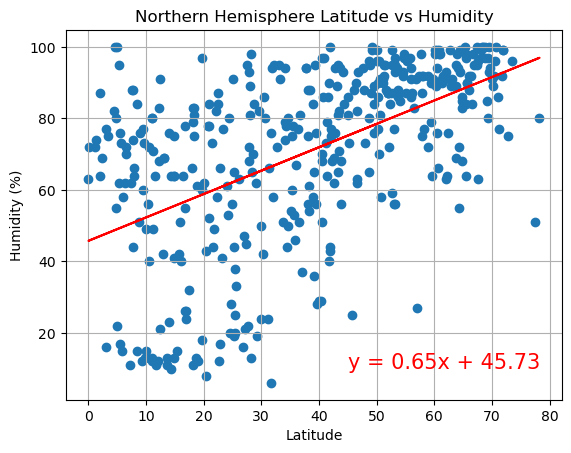

In [51]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]

regEQplotX = 45
regEQplotY = 10

y_label = "Humidity (%)"

plt.title(f'Northern Hemisphere Latitude vs Humidity')

linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

The r-square is 0.3743784356647498
y = 0.48x + 83.72


KeyError: 'Latitude'

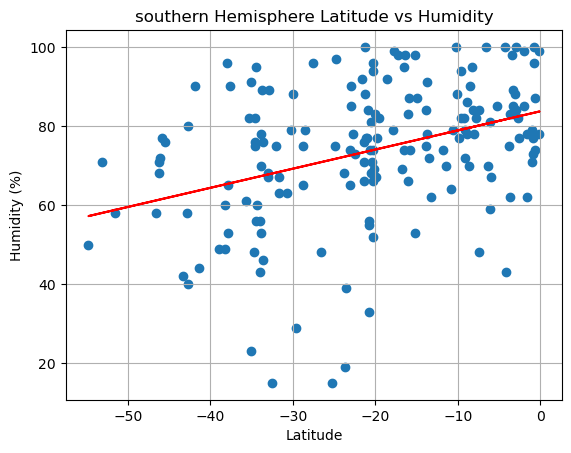

In [53]:
# Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]

regEQplotX = 45
regEQplotY = 10

y_label = "Humidity (%)"

plt.title(f'southern Hemisphere Latitude vs Humidity')

linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Humidity.png')
plt.show()

Hemisphere Latitude and Humidity Analysis:

In both the northern and southern hemispheres, there are strong coorilations between the humidity and the latitude. As the point gets closer to the equator, we see a raise in humidity in both hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-square is 0.2728927383755756
y = 0.54x + 40.99


KeyError: 'Latitude'

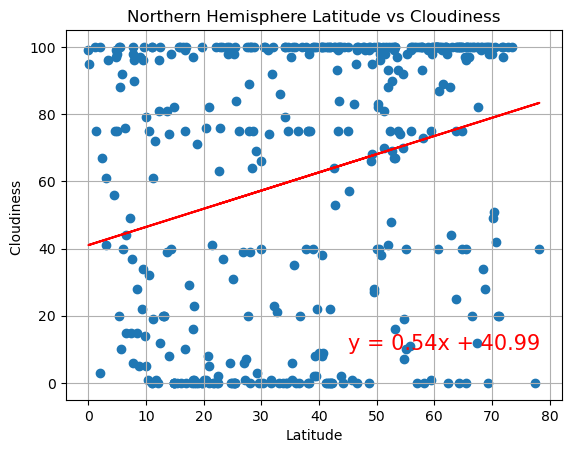

In [55]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]

regEQplotX = 45
regEQplotY = 10

y_label = "Cloudiness "

plt.title(f'Northern Hemisphere Latitude vs Cloudiness')

linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Cloudiness.png')
plt.show()

The r-square is 0.4695127924168317
y = 1.29x + 90.33


KeyError: 'Latitude'

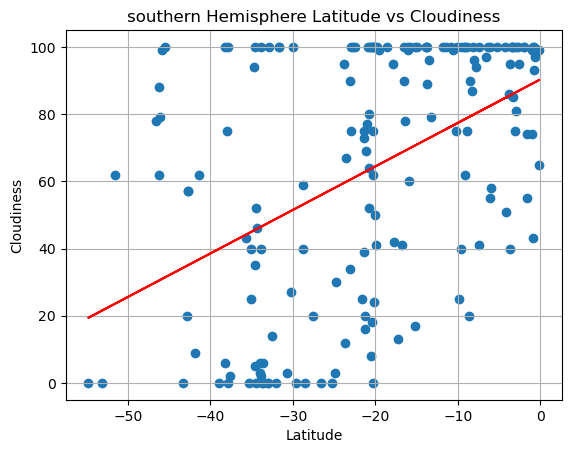

In [58]:
# Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

regEQplotX = 45
regEQplotY = 20

y_label = "Cloudiness"

plt.title(f'southern Hemisphere Latitude vs Cloudiness')

linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Cloudiness.png')
plt.show()

Hemisphere Latitude and Cloudiness Analysis: 

In both the northern and southern hemispheres, there are strong coorilations between the humidity and the latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is -0.011871018928567064
y = -0.0x + 3.84


KeyError: 'Latitude'

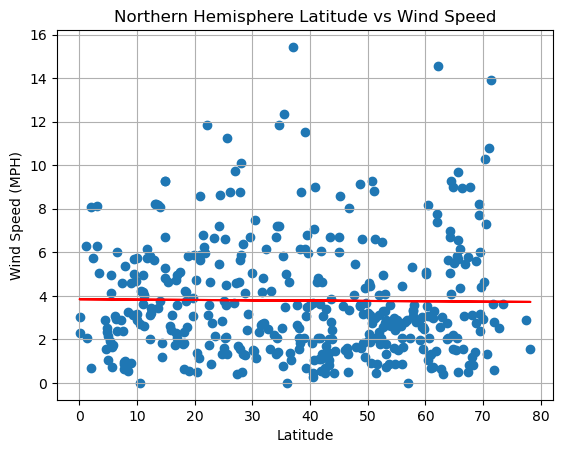

In [59]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]

regEQplotX = 35
regEQplotY = 25

y_label = "Wind Speed (MPH)"

plt.title(f'Northern Hemisphere Latitude vs Wind Speed')

linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Wind Speed.png')
plt.show()

The r-square is -0.20844988447524068
y = -0.04x + 2.64


KeyError: 'Latitude'

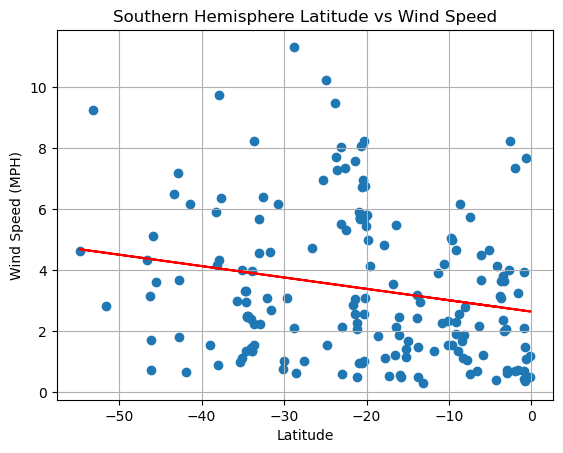

In [60]:
# Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

regEQplotX = 35
regEQplotY = 25

y_label = "Wind Speed (MPH)"

plt.title(f'Southern Hemisphere Latitude vs Wind Speed')

linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

Wind Speed vs. Latitude analysis:

There is no corrilation between wind speed and latitude in the northern hemisphere, but there is slight coorilation in the southern hemisphere. 